In [ ]:
import gym
import torch as th
from stable_baselines3 import DQN
from stable_baselines3.common.atari_wrappers import AtariWrapper

env = gym.make("ALE/Breakout-v5", frameskip=1)
env = AtariWrapper(env, frame_skip=4)

In [2]:
model = DQN("CnnPolicy",
            env,
            verbose=1,
            buffer_size=100_000,
            learning_rate=1e-4,
            batch_size=32,
            learning_starts=100_000,
            target_update_interval=1000,
            train_freq=4,
            gradient_steps=1,
            exploration_fraction=0.1,
            exploration_final_eps=0.01,
            tensorboard_log="./tb-logs")
model = DQN.load("dqn_breakout")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [ ]:
from PIL import Image

frames = []
obs = env.reset()
image = Image.fromarray(env.render(mode="rgb_array"))

for step in range(1500):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    frame = Image.fromarray(env.render(mode="rgb_array"))
    frames.append(frame)
    if done:
        obs = env.reset()

image.save('clip-sb3.gif',
           save_all=True, append_images=frames,
           optimize=False)


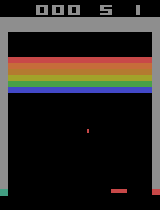

In [4]:
import tensorflow_docs.vis.embed as embed

embed.embed_file('clip-sb3.gif')